# HOtel Reservation Analysis

- Month base trend
- Total cancellation persentage
- Resort cancellation
- city hotel cancellation
- month base cancelltaion for both
- city base cancellation for both

# import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

# uploading data_set

In [3]:
df=pd.read_csv('hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.0,0,1,2,2.0,False


# First step : Data Audit 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104637 entries, 0 to 104636
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           104637 non-null  object 
 1   is_canceled                     104637 non-null  bool   
 2   lead_time                       104637 non-null  int64  
 3   arrival_date_month              104637 non-null  object 
 4   arrival_date_week_number        104637 non-null  int64  
 5   meal                            104637 non-null  object 
 6   country                         104637 non-null  object 
 7   market_segment                  104637 non-null  object 
 8   is_repeated_guest               104637 non-null  int64  
 9   previous_cancellations          104637 non-null  int64  
 10  previous_bookings_not_canceled  104637 non-null  int64  
 11  booking_changes                 104637 non-null  int64  
 12  deposit_type    

In [5]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
total_stay                        0
guests                            0
different_room_assigned           0
dtype: int64

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.0,0,1,2,2.0,False


# overall Cancellation

In [7]:
df.is_canceled.value_counts()

is_canceled
False    74947
True     29690
Name: count, dtype: int64

In [8]:
df.is_canceled.value_counts(normalize='True')

is_canceled
False    0.716257
True     0.283743
Name: proportion, dtype: float64

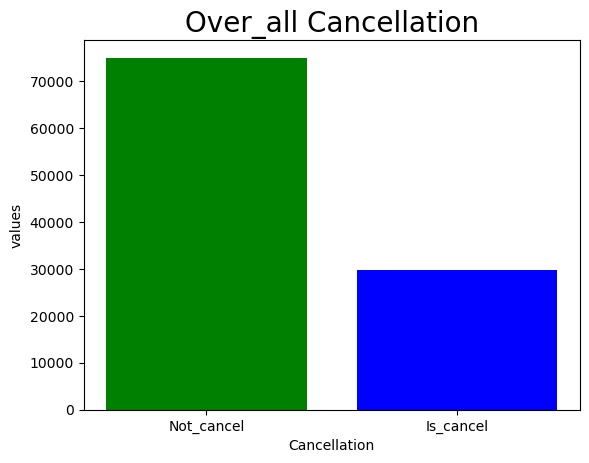

In [9]:
plt.title('Over_all Cancellation', fontsize=20)
plt.xlabel('Cancellation')
plt.ylabel('values')
plt.bar(['Not_cancel','Is_cancel'],df.is_canceled.value_counts(), color=['green', 'blue'])
plt.show()

# Resort_Hotel Cancellation

In [10]:
Resort_hotel=df[df['hotel']=='Resort Hotel']
Resort_hotel

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.00,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.00,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.00,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38194,Resort Hotel,False,212,August,35,BB,GBR,Offline TA/TO,0,0,...,1,No Deposit,0,Transient,89.75,0,0,10,3.0,False
38195,Resort Hotel,False,169,August,35,BB,IRL,Direct,0,0,...,0,No Deposit,0,Transient-Party,202.27,0,1,11,2.0,False
38196,Resort Hotel,False,204,August,35,BB,IRL,Direct,0,0,...,0,No Deposit,0,Transient,153.57,0,3,14,2.0,False
38197,Resort Hotel,False,211,August,35,HB,GBR,Offline TA/TO,0,0,...,0,No Deposit,0,Contract,112.80,0,1,14,2.0,False


In [11]:
Resort_hotel.is_canceled.value_counts()

is_canceled
False    28749
True      9450
Name: count, dtype: int64

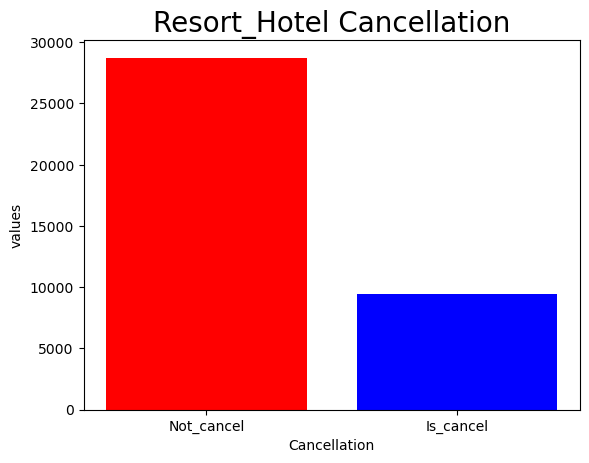

In [12]:
plt.title('Resort_Hotel Cancellation', fontsize=20)
plt.xlabel('Cancellation')
plt.ylabel('values')
plt.bar(['Not_cancel','Is_cancel'],Resort_hotel.is_canceled.value_counts(), color=['red','blue'])
plt.show()

# City_Hotel Cancellation

In [13]:
city_hotel=df[df['hotel']!='Resort Hotel']
city_hotel

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
38199,City Hotel,False,6,July,27,HB,PRT,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,0.00,0,0,2,1.0,False
38200,City Hotel,True,88,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,1,4,2.0,False
38201,City Hotel,True,65,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,68.00,0,1,4,1.0,False
38202,City Hotel,True,92,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,2,6,2.0,False
38203,City Hotel,True,100,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104632,City Hotel,False,23,August,35,BB,BEL,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,96.14,0,0,7,2.0,False
104633,City Hotel,False,102,August,35,BB,FRA,Online TA,0,0,...,0,No Deposit,0,Transient,225.43,0,2,7,3.0,False
104634,City Hotel,False,34,August,35,BB,DEU,Online TA,0,0,...,0,No Deposit,0,Transient,157.71,0,4,7,2.0,False
104635,City Hotel,False,109,August,35,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,104.40,0,0,7,2.0,False


In [14]:
city_hotel.is_canceled.value_counts()

is_canceled
False    46198
True     20240
Name: count, dtype: int64

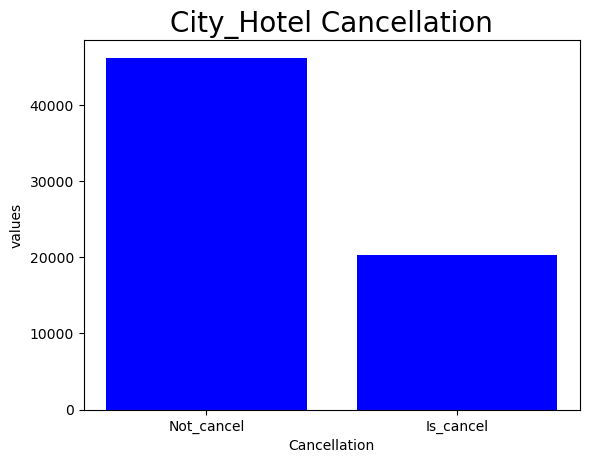

In [44]:
plt.title('City_Hotel Cancellation', fontsize=20)
plt.xlabel('Cancellation')
plt.ylabel('values')
plt.bar(['Not_cancel','Is_cancel'],city_hotel.is_canceled.value_counts(), color='blue')
plt.show()

# Both over_all cancelation overview

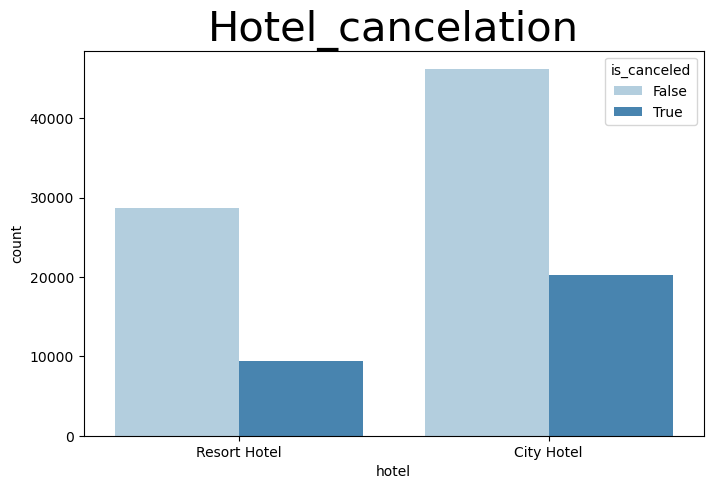

In [16]:
plt.figure( figsize = (8,5) )
ax1=sb.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
plt.title('Hotel_cancelation', fontsize=30)
plt.show()

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned'],
      dtype='object')

In [18]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [19]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.0,0,1,2,2.0,False


In [20]:
df1=df[df['is_canceled']==1]
df1

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
8,Resort Hotel,True,85,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,82.0,0,1,3,2.0,False
9,Resort Hotel,True,75,July,27,HB,PRT,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,105.5,0,0,3,2.0,False
10,Resort Hotel,True,23,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,123.0,0,0,4,2.0,False
27,Resort Hotel,True,60,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,107.0,0,2,7,2.0,False
32,Resort Hotel,True,96,July,27,BB,PRT,Direct,0,0,...,0,No Deposit,0,Transient,108.3,0,2,10,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95528,City Hotel,True,132,April,17,BB,FRA,Online TA,0,0,...,1,No Deposit,0,Transient,0.0,0,3,0,0.0,True
96602,City Hotel,True,4,June,23,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97171,City Hotel,True,7,May,22,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97172,City Hotel,True,6,July,29,BB,PRT,Corporate,1,1,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,True


# Cancelation by Month

In [21]:
month_cancel=df1.groupby('arrival_date_month').sum()['is_canceled'].reset_index()

In [22]:
month_cancel.sort_values('is_canceled', ascending=False)

,arrival_date_month,is_canceled
1,August,4326
5,July,4066
8,May,3012
0,April,2832
6,June,2732
10,October,2400
11,September,2163
7,March,2079
3,February,1867
2,December,1660


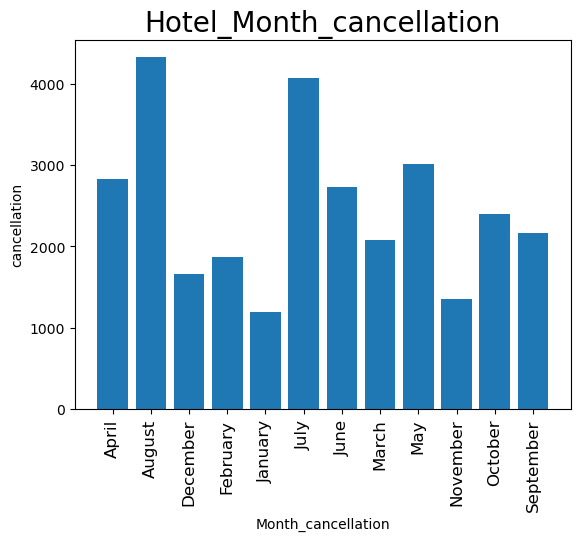

In [23]:
plt.title('Hotel_Month_cancellation', fontsize=20)
plt.xlabel('Month_cancellation')
plt.ylabel('cancellation')
plt.bar(month_cancel['arrival_date_month'],month_cancel['is_canceled'])
plt.xticks(rotation='vertical', size=12)
plt.show()

# City_Hotel

In [24]:
city_hotel=df[df['hotel']!='Resort Hotel']
city_hotel

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
38199,City Hotel,False,6,July,27,HB,PRT,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,0.00,0,0,2,1.0,False
38200,City Hotel,True,88,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,1,4,2.0,False
38201,City Hotel,True,65,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,68.00,0,1,4,1.0,False
38202,City Hotel,True,92,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,2,6,2.0,False
38203,City Hotel,True,100,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.50,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104632,City Hotel,False,23,August,35,BB,BEL,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,96.14,0,0,7,2.0,False
104633,City Hotel,False,102,August,35,BB,FRA,Online TA,0,0,...,0,No Deposit,0,Transient,225.43,0,2,7,3.0,False
104634,City Hotel,False,34,August,35,BB,DEU,Online TA,0,0,...,0,No Deposit,0,Transient,157.71,0,4,7,2.0,False
104635,City Hotel,False,109,August,35,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,104.40,0,0,7,2.0,False


In [25]:
city_Month=city_hotel[city_hotel['is_canceled']==1]
city_Month

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
38200,City Hotel,True,88,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.5,0,1,4,2.0,False
38201,City Hotel,True,65,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,68.0,0,1,4,1.0,False
38202,City Hotel,True,92,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.5,0,2,6,2.0,False
38203,City Hotel,True,100,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.5,0,1,2,2.0,False
38204,City Hotel,True,79,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,76.5,0,1,3,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95528,City Hotel,True,132,April,17,BB,FRA,Online TA,0,0,...,1,No Deposit,0,Transient,0.0,0,3,0,0.0,True
96602,City Hotel,True,4,June,23,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97171,City Hotel,True,7,May,22,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97172,City Hotel,True,6,July,29,BB,PRT,Corporate,1,1,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,True


In [26]:
city_Month_cancel=city_Month.groupby('arrival_date_month').sum()['is_canceled'].reset_index()

In [27]:
city_Month_cancel.sort_values('is_canceled',ascending=False)

,arrival_date_month,is_canceled
1,August,2708
5,July,2656
8,May,2097
0,April,2040
6,June,1824
10,October,1688
7,March,1496
11,September,1479
3,February,1282
2,December,1126


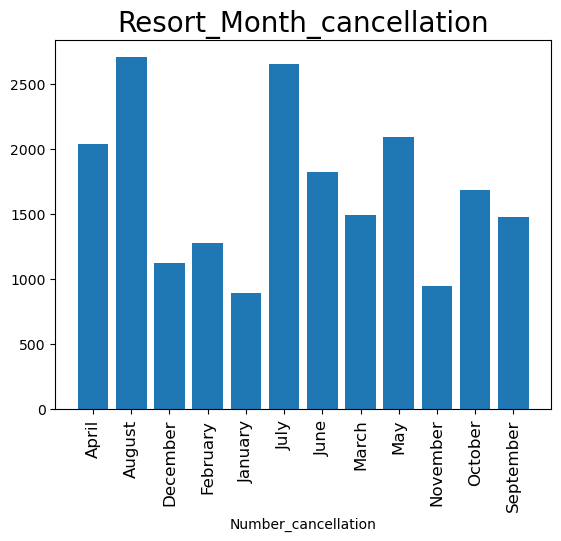

In [28]:
plt.title('Resort_Month_cancellation', fontsize=20)
plt.xlabel('Month_cancellation')
plt.xlabel('Number_cancellation')
plt.bar(city_Month_cancel['arrival_date_month'],city_Month_cancel['is_canceled'])
plt.xticks(rotation='vertical', size=12)
plt.show()

# Resort_Hotel

In [29]:
Resort_hotel=df[df['hotel']=='Resort Hotel']
Resort_hotel

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.00,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.00,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.00,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.00,0,1,2,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38194,Resort Hotel,False,212,August,35,BB,GBR,Offline TA/TO,0,0,...,1,No Deposit,0,Transient,89.75,0,0,10,3.0,False
38195,Resort Hotel,False,169,August,35,BB,IRL,Direct,0,0,...,0,No Deposit,0,Transient-Party,202.27,0,1,11,2.0,False
38196,Resort Hotel,False,204,August,35,BB,IRL,Direct,0,0,...,0,No Deposit,0,Transient,153.57,0,3,14,2.0,False
38197,Resort Hotel,False,211,August,35,HB,GBR,Offline TA/TO,0,0,...,0,No Deposit,0,Contract,112.80,0,1,14,2.0,False


In [30]:
Resort_Month=Resort_hotel[Resort_hotel['is_canceled']==1]
Resort_Month

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
8,Resort Hotel,True,85,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,82.00,0,1,3,2.0,False
9,Resort Hotel,True,75,July,27,HB,PRT,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,105.50,0,0,3,2.0,False
10,Resort Hotel,True,23,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,123.00,0,0,4,2.0,False
27,Resort Hotel,True,60,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,107.00,0,2,7,2.0,False
32,Resort Hotel,True,96,July,27,BB,PRT,Direct,0,0,...,0,No Deposit,0,Transient,108.30,0,2,10,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,Resort Hotel,True,0,March,12,BB,PRT,Direct,1,0,...,0,No Deposit,0,Transient,35.00,0,0,1,1.0,True
30824,Resort Hotel,True,0,March,12,BB,PRT,Direct,1,0,...,0,No Deposit,0,Transient,35.00,0,0,1,1.0,True
30975,Resort Hotel,True,20,February,6,BB,PRT,Direct,0,0,...,0,No Deposit,0,Transient,45.00,0,1,1,2.0,False
32847,Resort Hotel,True,0,August,34,BB,AGO,Direct,1,0,...,0,No Deposit,0,Transient,190.00,0,0,1,1.0,False


In [31]:
Resort_Month_cancel=Resort_Month.groupby('arrival_date_month').sum()['is_canceled'].reset_index()

In [32]:
Resort_Month_cancel.sort_values('is_canceled',ascending=False)

,arrival_date_month,is_canceled
1,August,1618
5,July,1410
8,May,915
6,June,908
0,April,792
10,October,712
11,September,684
3,February,585
7,March,583
2,December,534


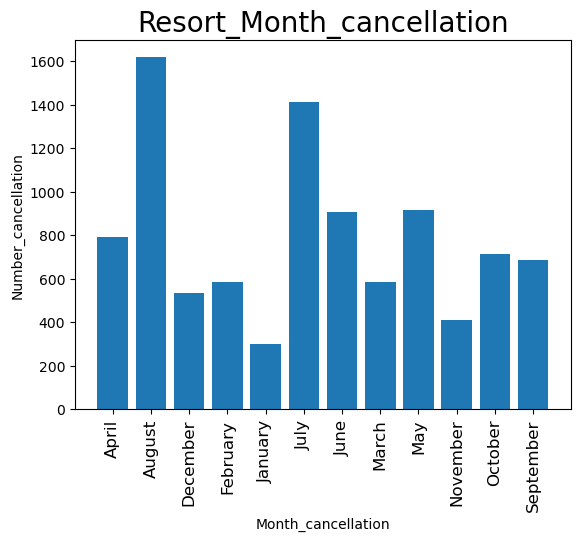

In [33]:
plt.title('Resort_Month_cancellation', fontsize=20)
plt.xlabel('Month_cancellation')
plt.ylabel('Number_cancellation')
plt.bar(Resort_Month_cancel['arrival_date_month'],Resort_Month_cancel['is_canceled'])
plt.xticks(rotation='vertical', size=12)
plt.show()

In [34]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True


In [35]:
df1

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
8,Resort Hotel,True,85,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,82.0,0,1,3,2.0,False
9,Resort Hotel,True,75,July,27,HB,PRT,Offline TA/TO,0,0,...,0,No Deposit,0,Transient,105.5,0,0,3,2.0,False
10,Resort Hotel,True,23,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,123.0,0,0,4,2.0,False
27,Resort Hotel,True,60,July,27,BB,PRT,Online TA,0,0,...,0,No Deposit,0,Transient,107.0,0,2,7,2.0,False
32,Resort Hotel,True,96,July,27,BB,PRT,Direct,0,0,...,0,No Deposit,0,Transient,108.3,0,2,10,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95528,City Hotel,True,132,April,17,BB,FRA,Online TA,0,0,...,1,No Deposit,0,Transient,0.0,0,3,0,0.0,True
96602,City Hotel,True,4,June,23,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97171,City Hotel,True,7,May,22,BB,PRT,Corporate,1,0,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,False
97172,City Hotel,True,6,July,29,BB,PRT,Corporate,1,1,...,0,No Deposit,0,Transient,65.0,0,0,1,1.0,True


In [36]:
df1.country.unique()

array(['PRT', 'IRL', 'ESP', 'DEU', 'ITA', 'GBR', 'FRA', 'ARE', 'BRA',
       'NLD', 'FIN', 'CHE', 'TUN', 'BEL', 'USA', 'ARG', 'NOR', 'CN',
       'CHN', 'POL', 'DNK', 'ALB', 'RUS', 'SWE', 'AUT', 'HKG', 'IND',
       'CZE', 'LUX', 'GEO', 'DZA', 'MAR', 'AND', 'ROU', 'TUR', 'MOZ',
       'ZAF', 'GIB', 'AUS', 'URY', 'BLR', 'JEY', 'CYP', 'EST', 'ISR',
       'GRC', 'LVA', 'COL', 'GGY', 'KWT', 'NGA', 'KOR', 'CHL', 'HUN',
       'HRV', 'MDV', 'VEN', 'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN',
       'SVN', 'LBN', 'PHL', 'LTU', 'SEN', 'SYC', 'AZE', 'BHR', 'IRN',
       'SAU', 'UKR', 'ECU', 'OMN', 'CPV', 'THA', 'TWN', 'HND', 'SRB',
       'JPN', 'SGP', 'MEX', 'ZMB', 'QAT', 'NZL', 'KHM', 'MCO', 'BGD',
       'UZB', 'BGR', 'IMN', 'TJK', 'ARM', 'PER', 'NIC', 'ISL', 'BEN',
       'MAC', 'VGB', 'MUS', 'MLT', 'EGY', 'CRI', 'TZA', 'JOR', 'MYS',
       'GAB', 'MKD', 'BIH', 'VNM', 'GHA', 'TMP', 'GLP', 'KEN', 'PRI',
       'DOM', 'LIE', 'GNB', 'ETH', 'MNE', 'UMI', 'MYT', 'FRO', 'CIV',
       'ZWE'], dtype=

# cancelation by country

In [37]:
country_cancel=df1.groupby('country').sum()['is_canceled'].reset_index()

In [38]:
top_10=country_cancel.sort_values('is_canceled', ascending=False)[:10]

In [39]:
top_10

,country,is_canceled
97,PRT,13405
41,GBR,2321
33,ESP,2042
38,FRA,1923
60,ITA,1333
27,DEU,1217
56,IRL,829
16,BRA,829
119,USA,500
19,CHN,462


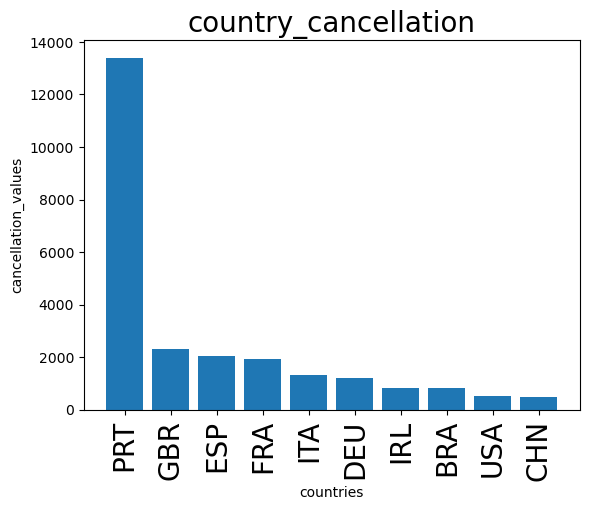

<Figure size 500x800 with 0 Axes>

In [40]:
plt.title('country_cancellation', fontsize=20)
plt.xlabel('countries')
plt.ylabel('cancellation_values')
plt.bar(top_10['country'],top_10['is_canceled'])
plt.xticks(rotation='vertical', size=20)
plt.figure(figsize=(5,8))
plt.show()

In [41]:
trend=df1.groupby('arrival_date_month').sum()['is_canceled'].reset_index()
trend

,arrival_date_month,is_canceled
0,April,2832
1,August,4326
2,December,1660
3,February,1867
4,January,1195
5,July,4066
6,June,2732
7,March,2079
8,May,3012
9,November,1358


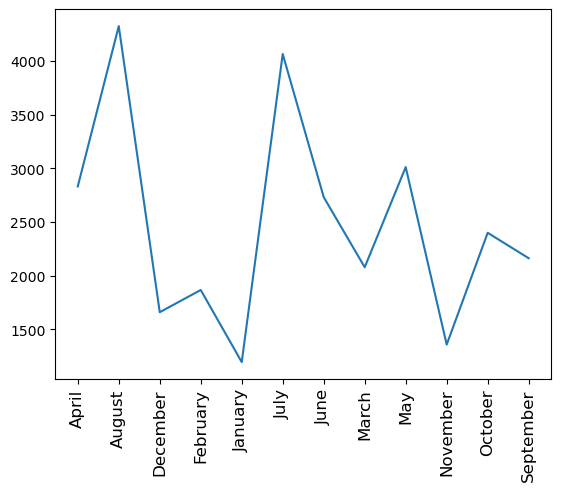

In [42]:
plt.plot(trend['arrival_date_month'],trend['is_canceled'])
plt.xticks(rotation='vertical', size=12)
plt.show()